In [4]:
import numpy as np
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv("adult.csv")
df

age workclass  education marital-status   race     sex  hours-per-week  \
0     39    Public         13         Single  White    Male              40   
1     50  Self-emp         13        Married  White    Male              13   
2     38   Private          9         Single  White    Male              40   
3     53   Private          7        Married  Black    Male              40   
4     28   Private         13        Married  Black  Female              40   
...   ..       ...        ...            ...    ...     ...             ...   
9995  38   Private         10        Married  White    Male              60   
9996  25   Private          9         Single  White  Female               8   
9997  21   Private         10         Single  Black    Male              40   
9998   ?   Private          2        Married  White    Male              53   
9999  39   Private         10         Single  White  Female              40   

     income  
0     <=50K  
1     <=50K  
2     <=50K  
3     <=50K  
4     <=50K  
...     ...  
9995   >50K  
9996  <=50K  
9997  <=50K  
9998  <=50K  
9999  <=50K  

[10000 rows x 8 columns]

In [48]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age               10000 non-null object
workclass         10000 non-null object
education         10000 non-null int64
marital-status    10000 non-null object
race              10000 non-null object
sex               10000 non-null object
hours-per-week    10000 non-null int64
income            10000 non-null object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [50]:
df.replace({'age': {'?': np.nan}}, regex=False,inplace=True)
df.replace({'workclass': {'?': np.nan}}, regex=False,inplace=True)

In [51]:
df.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [52]:
#lets fill in the missing values of age with the mean of the column
df['age'].fillna((df['age'].astype(float).mean()), inplace=True)

In [53]:
df.isnull().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [54]:
#for the categorical variable, lets remove the rows with missing values
df = df.dropna()
df.shape

(9412, 8)

In [55]:
#we have now sorted the missing values issue
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
age               9412 non-null object
workclass         9412 non-null object
education         9412 non-null int64
marital-status    9412 non-null object
race              9412 non-null object
sex               9412 non-null object
hours-per-week    9412 non-null int64
income            9412 non-null object
dtypes: int64(2), object(6)
memory usage: 661.8+ KB


In [58]:
df['age'] = df['age'].astype(str).astype(float)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
age               9412 non-null float64
workclass         9412 non-null object
education         9412 non-null int64
marital-status    9412 non-null object
race              9412 non-null object
sex               9412 non-null object
hours-per-week    9412 non-null int64
income            9412 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


In [60]:
df.describe()

age    education  hours-per-week
count  9412.000000  9412.000000     9412.000000
mean     38.366342    10.125266       41.080217
std      12.962039     2.542118       11.884590
min      17.000000     1.000000        1.000000
25%      28.000000     9.000000       40.000000
50%      37.000000    10.000000       40.000000
75%      47.000000    13.000000       45.000000
max      90.000000    16.000000       99.000000

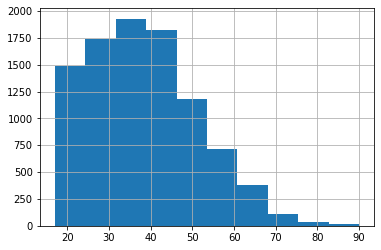

In [61]:
df['age'].hist()

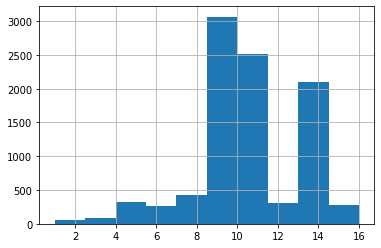

In [62]:
df['education'].hist()

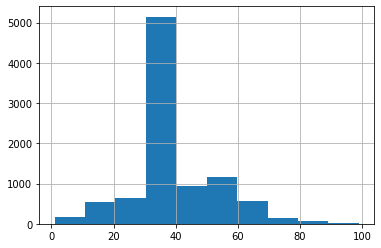

In [63]:
df['hours-per-week'].hist()

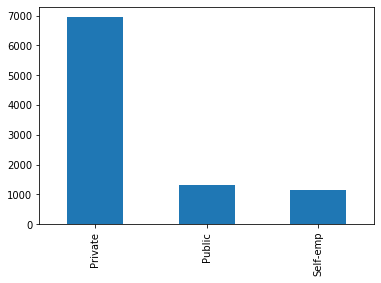

In [64]:
df['workclass'].value_counts().plot(kind='bar')

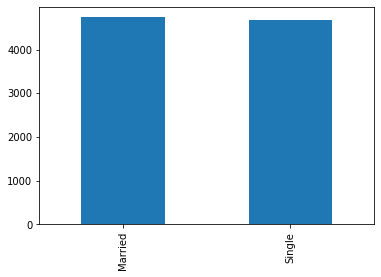

In [65]:
df['marital-status'].value_counts().plot(kind='bar')

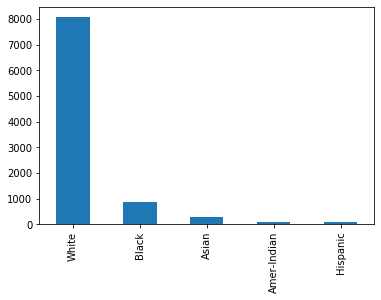

In [66]:
df['race'].value_counts().plot(kind='bar')

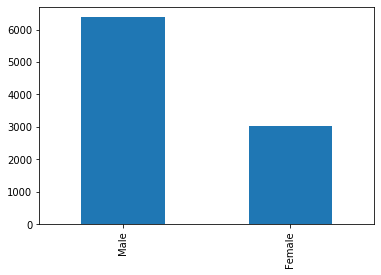

In [67]:
df['sex'].value_counts().plot(kind='bar')

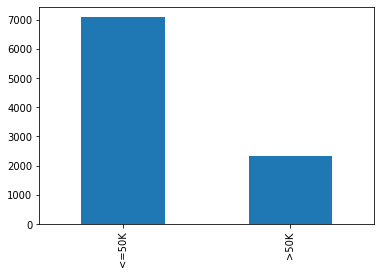

In [68]:
df['income'].value_counts().plot(kind='bar')

In [71]:
cross_tab1 = pd.crosstab(df.education, df.race)
cross_tab1

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

## There are more whites with higher number fo years in eduaction

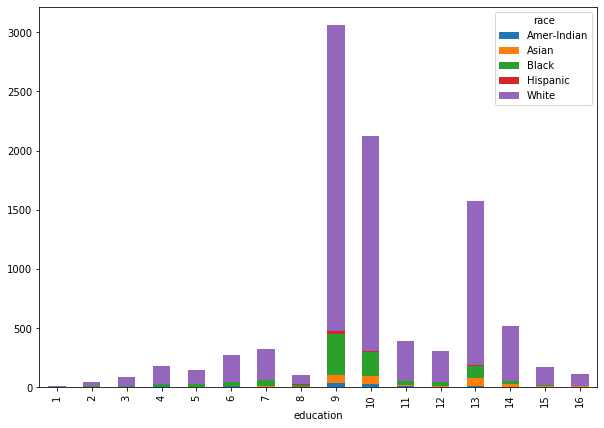

In [74]:
cross_tab1.plot.bar(stacked=True, figsize=(10,7))

In [75]:
cross_tab2 = pd.crosstab(df.workclass, df.income)
cross_tab2

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

## If you are a high income earner, then you are working mostly private jobs, followed by self employed

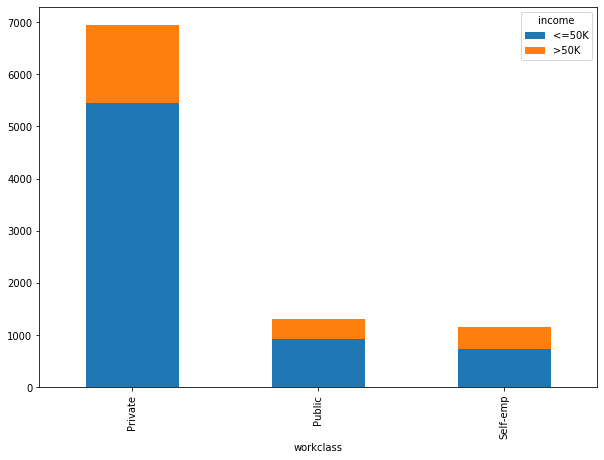

In [76]:
cross_tab2.plot.bar(stacked=True, figsize=(10,7))

In [77]:
cross_tab3 = pd.crosstab(df.workclass, df.race)
cross_tab3

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060

## All the races above are working more in the private sector, then the public sector and very few are self employed

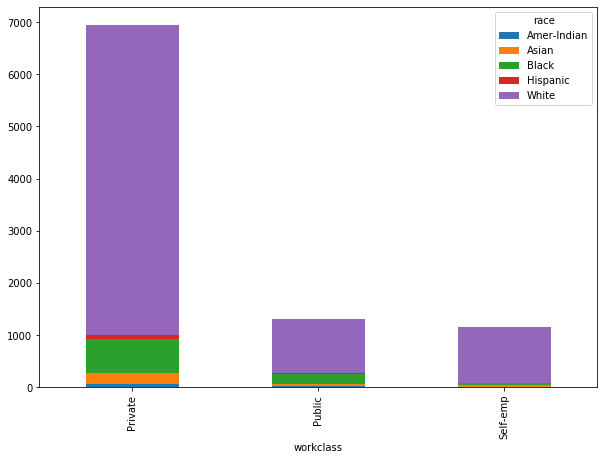

In [78]:
cross_tab3.plot.bar(stacked=True, figsize=(10,7))

In [79]:
cross_tab4 = pd.crosstab(df.race, df.income)
cross_tab4

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

## In the low income category, most of them are white, followed by black and asian.

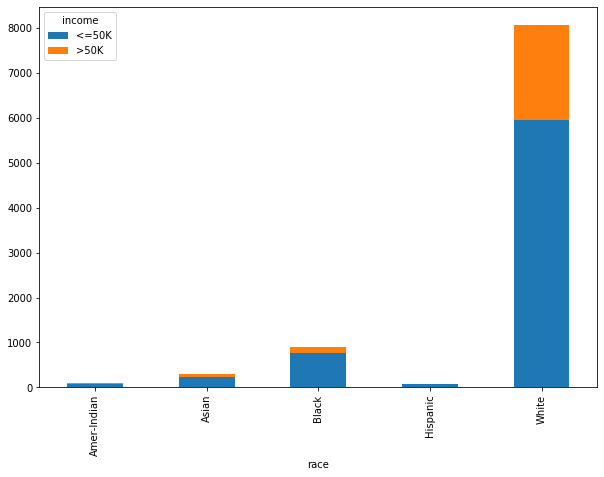

In [80]:
cross_tab4.plot.bar(stacked=True, figsize=(10,7))

In [83]:
cross_tab5 = pd.crosstab(df.race, df.income, normalize='columns')\
    .round(4)*100
cross_tab5

income       <=50K   >50K
race                     
Amer-Indian   1.17   0.39
Asian         3.16   2.89
Black        10.90   5.13
Hispanic      0.97   0.26
White        83.80  91.33

## You can see that in the low income group, majority is white with 84% and then black with 11%.

In [84]:
#lets subset the data into low income and high income
high_df = df[(df['income'] == ">50K")]

low_df = df[(df['income'] == "<=50K")]

#lets compare their statitical summaries
high_df.describe()

age    education  hours-per-week
count  2319.000000  2319.000000     2319.000000
mean     43.632531    11.588185       45.708495
std      10.042135     2.410764       10.678794
min      19.000000     2.000000        1.000000
25%      36.000000     9.000000       40.000000
50%      43.000000    12.000000       40.000000
75%      50.000000    13.000000       50.000000
max      90.000000    16.000000       99.000000

In [85]:
low_df.describe()

age    education  hours-per-week
count  7093.000000  7093.000000     7093.000000
mean     36.644604     9.646976       39.567038
std      13.340142     2.397358       11.868506
min      17.000000     1.000000        1.000000
25%      26.000000     9.000000       38.000000
50%      35.000000     9.000000       40.000000
75%      45.000000    10.000000       40.000000
max      90.000000    16.000000       99.000000

## high income earners have a higher mean age as compared to low income earners, they also have more mean years in education and their mean houes per week is higher.

In [86]:
df

age workclass  education marital-status   race     sex  \
0     39.000000    Public         13         Single  White    Male   
1     50.000000  Self-emp         13        Married  White    Male   
2     38.000000   Private          9         Single  White    Male   
3     53.000000   Private          7        Married  Black    Male   
4     28.000000   Private         13        Married  Black  Female   
...         ...       ...        ...            ...    ...     ...   
9995  38.000000   Private         10        Married  White    Male   
9996  25.000000   Private          9         Single  White  Female   
9997  21.000000   Private         10         Single  Black    Male   
9998  38.449806   Private          2        Married  White    Male   
9999  39.000000   Private         10         Single  White  Female   

      hours-per-week income  
0                 40  <=50K  
1                 13  <=50K  
2                 40  <=50K  
3                 40  <=50K  
4                 40  <=50K  
...              ...    ...  
9995              60   >50K  
9996               8  <=50K  
9997              40  <=50K  
9998              53  <=50K  
9999              40  <=50K  

[9412 rows x 8 columns]

In [87]:
df_dummies = pd.get_dummies(df, prefix=['workclass', 'marital-status', 'race','sex', 'income'], columns=['workclass', 'marital-status', 'race','sex', 'income'])
df_dummies

age  education  hours-per-week  workclass_Private  \
0     39.000000         13              40                  0   
1     50.000000         13              13                  0   
2     38.000000          9              40                  1   
3     53.000000          7              40                  1   
4     28.000000         13              40                  1   
...         ...        ...             ...                ...   
9995  38.000000         10              60                  1   
9996  25.000000          9               8                  1   
9997  21.000000         10              40                  1   
9998  38.449806          2              53                  1   
9999  39.000000         10              40                  1   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
0                    1                   0                       0   
1                    0                   1                       1   
2                    0                   0                       0   
3                    0                   0                       1   
4                    0                   0                       1   
...                ...                 ...                     ...   
9995                 0                   0                       1   
9996                 0                   0                       0   
9997                 0                   0                       0   
9998                 0                   0                       1   
9999                 0                   0                       0   

      marital-status_Single  race_Amer-Indian  race_Asian  race_Black  \
0                         1                 0           0           0   
1                         0                 0           0           0   
2                         1                 0           0           0   
3                         0                 0           0           1   
4                         0                 0           0           1   
...                     ...               ...         ...         ...   
9995                      0                 0           0           0   
9996                      1                 0           0           0   
9997                      1                 0           0           1   
9998                      0                 0           0           0   
9999                      1                 0           0           0   

      race_Hispanic  race_White  sex_Female  sex_Male  income_<=50K  \
0                 0           1           0         1             1   
1                 0           1           0         1             1   
2                 0           1           0         1             1   
3                 0           0           0         1             1   
4                 0           0           1         0             1   
...             ...         ...         ...       ...           ...   
9995              0           1           0         1             0   
9996              0           1           1         0             1   
9997              0           0           0         1             1   
9998              0           1           0         1             1   
9999              0           1           1         0             1   

      income_>50K  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            0  
9997            0  
9998            0  
9999            0  

[9412 rows x 17 columns]

In [88]:
df_dummies = df_dummies.drop('income_<=50K', 1)

In [92]:
target = df_dummies['income_>50K']
target

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: income_>50K, Length: 9412, dtype: uint8

In [93]:
X = df_dummies.drop('income_>50K', 1)
X

age  education  hours-per-week  workclass_Private  \
0     39.000000         13              40                  0   
1     50.000000         13              13                  0   
2     38.000000          9              40                  1   
3     53.000000          7              40                  1   
4     28.000000         13              40                  1   
...         ...        ...             ...                ...   
9995  38.000000         10              60                  1   
9996  25.000000          9               8                  1   
9997  21.000000         10              40                  1   
9998  38.449806          2              53                  1   
9999  39.000000         10              40                  1   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
0                    1                   0                       0   
1                    0                   1                       1   
2                    0                   0                       0   
3                    0                   0                       1   
4                    0                   0                       1   
...                ...                 ...                     ...   
9995                 0                   0                       1   
9996                 0                   0                       0   
9997                 0                   0                       0   
9998                 0                   0                       1   
9999                 0                   0                       0   

      marital-status_Single  race_Amer-Indian  race_Asian  race_Black  \
0                         1                 0           0           0   
1                         0                 0           0           0   
2                         1                 0           0           0   
3                         0                 0           0           1   
4                         0                 0           0           1   
...                     ...               ...         ...         ...   
9995                      0                 0           0           0   
9996                      1                 0           0           0   
9997                      1                 0           0           1   
9998                      0                 0           0           0   
9999                      1                 0           0           0   

      race_Hispanic  race_White  sex_Female  sex_Male  
0                 0           1           0         1  
1                 0           1           0         1  
2                 0           1           0         1  
3                 0           0           0         1  
4                 0           0           1         0  
...             ...         ...         ...       ...  
9995              0           1           0         1  
9996              0           1           1         0  
9997              0           0           0         1  
9998              0           1           0         1  
9999              0           1           1         0  

[9412 rows x 15 columns]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.2, random_state=33)
X_train

age  education  hours-per-week  workclass_Private  \
287   50.000000         10              45                  1   
7852  41.000000          9              40                  1   
5887  38.449806          9              50                  0   
4791  44.000000          9              40                  1   
6540  21.000000         10              45                  1   
...         ...        ...             ...                ...   
58    41.000000          9              48                  1   
619   46.000000         15              45                  1   
6239  48.000000         10              40                  1   
2612  31.000000          9              40                  0   
7644  17.000000          5              40                  1   

      workclass_Public  workclass_Self-emp  marital-status_Married  \
287                  0                   0                       0   
7852                 0                   0                       0   
5887                 1                   0                       0   
4791                 0                   0                       0   
6540                 0                   0                       0   
...                ...                 ...                     ...   
58                   0                   0                       1   
619                  0                   0                       1   
6239                 0                   0                       0   
2612                 1                   0                       1   
7644                 0                   0                       1   

      marital-status_Single  race_Amer-Indian  race_Asian  race_Black  \
287                       1                 0           0           0   
7852                      1                 0           0           0   
5887                      1                 0           0           0   
4791                      1                 0           0           0   
6540                      1                 0           0           0   
...                     ...               ...         ...         ...   
58                        0                 0           0           0   
619                       0                 0           0           0   
6239                      1                 0           0           1   
2612                      0                 0           0           0   
7644                      0                 0           0           0   

      race_Hispanic  race_White  sex_Female  sex_Male  
287               0           1           0         1  
7852              0           1           1         0  
5887              0           1           0         1  
4791              0           1           1         0  
6540              0           1           0         1  
...             ...         ...         ...       ...  
58                0           1           0         1  
619               0           1           0         1  
6239              0           0           1         0  
2612              0           1           0         1  
7644              0           1           0         1  

[7529 rows x 15 columns]

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(X_train, target_train)
ldpreds = ldclf.predict(X_test)
print (ldpreds)

[1 0 0 ... 0 0 1]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [96]:
from sklearn import model_selection
cv_scores = model_selection.cross_val_score(ldclf, X, target, cv=5)
cv_scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([0.80987785, 0.80350505, 0.80031864, 0.80446334, 0.81765019])

In [97]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.01)


In [98]:
from sklearn import tree, naive_bayes

In [99]:
#Decsion Tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(X_train, target_train)
treepreds = treeclf.predict(X_test)
print (treepreds)

[0 1 0 ... 0 0 1]


In [100]:
from sklearn import model_selection
cv_scores = model_selection.cross_val_score(treeclf, X, target, cv=5)
cv_scores
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.77 (+/- 0.01)


In [101]:
#Naive Bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X_train, target_train)
nbpreds = nbclf.predict(X_test)
print (nbpreds)

[1 1 0 ... 1 0 1]


In [102]:
from sklearn import model_selection
cv_scores = model_selection.cross_val_score(nbclf, X, target, cv=5)
cv_scores
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.00)


In [103]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree.dot', feature_names=X_train.columns)

In [109]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.10.1               |   py37hecd8cb5_1         2.9 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pix

In [110]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#scroll below to see entire tree